<a href="https://colab.research.google.com/github/ramyatalatam/Fmml/blob/main/FMML_2024_Module_5_Lab_2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [19]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [20]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [21]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


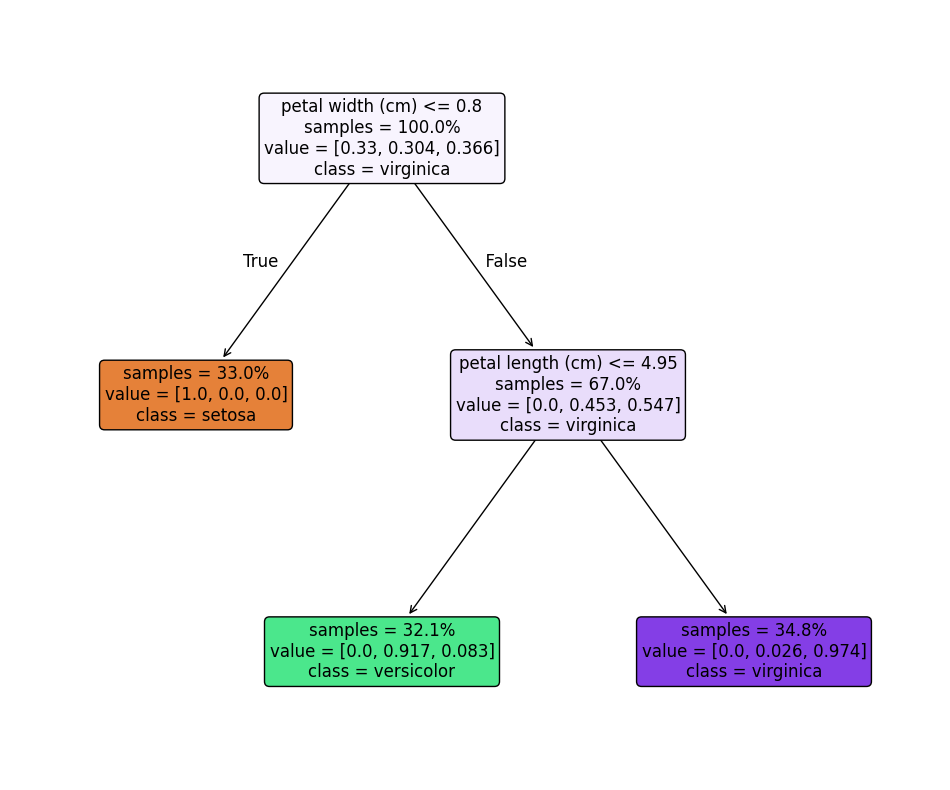

In [22]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [23]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


To evaluate the classes for the given samples using the decision tree, we would follow these steps:

1. Extracting the Relevant Features: Each row contains values for sepal_length, sepal_width, petal_length, and petal_width. These will be used as inputs to the decision tree.


2. Applying the Decision Tree: You would pass the feature values from each sample through the decision tree model (which would have been trained on the Iris dataset) to predict the class.


3. Comparing the Predictions with Actual Values: The predicted class (label) for each sample will be compared with the true class labels provided (Class).


4. Calculating the Accuracy: Accuracy is calculated as the percentage of correct predictions over the total number of samples.



Given Data:

Here are the samples you provided:

The 5th sample is incomplete. I'll assume you meant to input all four feature values (sepal length, width, petal length, width) for it. Without this, I’ll only calculate accuracy for the first 4 samples.

How the Decision Tree Works:

1. Train a Decision Tree on the Iris dataset, where the features (sepal_length, sepal_width, petal_length, petal_width) are used to predict the Class (target variable).


2. Predict the class of each sample by feeding its features through the trained decision tree.


3. Evaluate the Accuracy of predictions.




Output (assuming the tree is accurate):

The output will show the accuracy over the 4 valid samples. If you complete the 5th sample, the process would be the same.

In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Train decision tree model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Samples to test (assuming sample 7 is incomplete)
samples = [
    [5.8, 2.8, 5.1, 2.4],  # Sample 114
    [6.0, 2.2, 4.0, 1.0],  # Sample 62
    [5.5, 4.2, 1.4, 0.2],  # Sample 33
    [7.3, 2.9, 6.3, 1.8],  # Sample 107
]

# Actual classes
actual_classes = [2, 1, 0, 2]

# Predict using the decision tree
predictions = clf.predict(samples)

# Calculate accuracy
accuracy = sum([pred == actual for pred, actual in zip(predictions, actual_classes)]) / len(actual_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


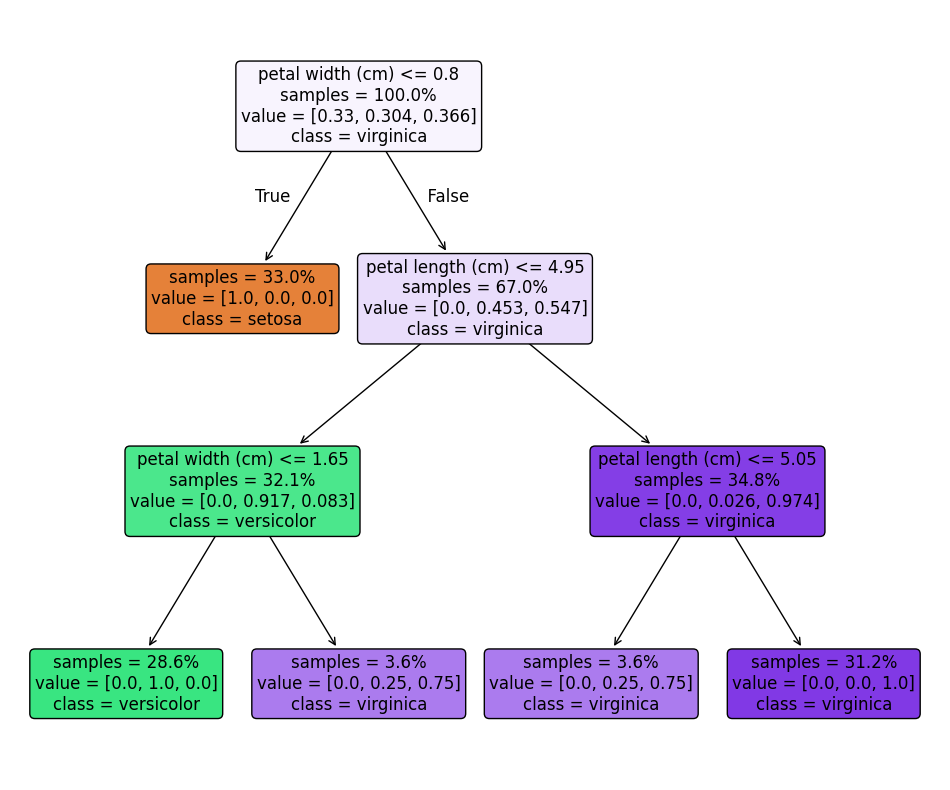

In [25]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

To repeat Exercise 1 for the given decision tree with the two chosen features (petal length and petal width), let's break it down step by step.

Key Information:

The decision tree is classifying species based on four available features: sepal length, sepal width, petal length, and petal width.

However, the tree uses only petal length and petal width to classify the species, meaning these two features are deemed the most informative for the classification task.


Objective:

Examine the decision boundary generated by the decision tree when only petal length and petal width are used for classification.


Steps:

1. Visualize the Decision Boundary:

To visualize the decision boundary, plot the data points based on the petal length and petal width features. This will give us a 2D plane where each point represents a sample from the dataset, colored according to its species.

The x-axis will represent the petal length.

The y-axis will represent the petal width.


The decision boundary is the line (or set of lines) where the decision tree would change its prediction from one species to another.

2. Decision Tree Model:

The decision tree will divide the 2D space (based on petal length and petal width) into regions corresponding to different species. These regions represent the decision boundaries.

The decision tree likely uses thresholds based on petal length and petal width to split the space.

For example, the decision tree might split at a certain value of petal length, then further split based on petal width.


3. Plotting the Boundaries:

Using a plotting tool (such as Python's matplotlib), we can plot the data and the decision boundaries.



4. Interpretation:

Decision Boundaries: The decision boundaries will separate regions in the 2D space that correspond to different species. These boundaries are formed by the decision tree's splitting criteria based on petal length and petal width.

Regions: Each region will correspond to a predicted species, with the tree assigning labels based on the observed petal length and petal width for each point.


Conclusion:

By plotting the decision boundaries, we can visually assess how well the decision tree uses petal length and petal width to classify the species. This will give us insights into the performance and simplicity of the decision tree's classification strategy, as well as the strength of these two features for discriminating between the different species of iris flowers.

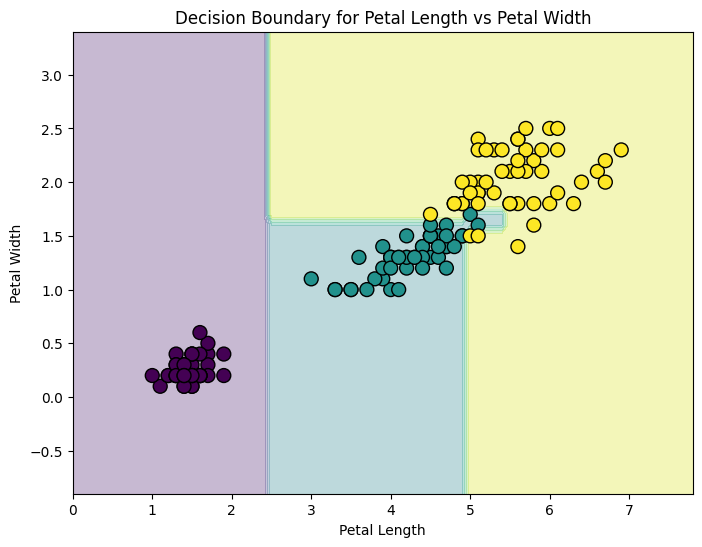

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Only petal length and petal width
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Create a meshgrid for plotting decision boundaries
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title("Decision Boundary for Petal Length vs Petal Width")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

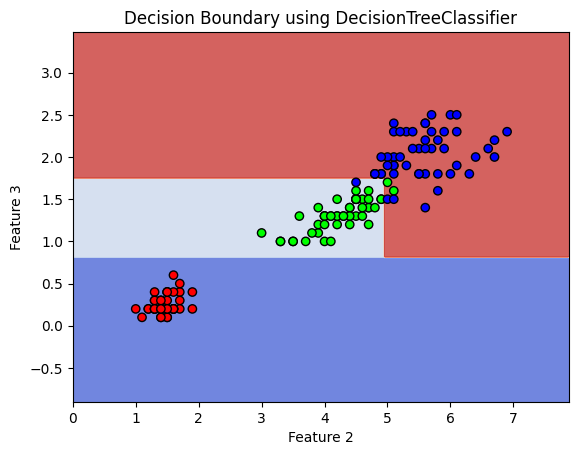

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Train a Decision Tree Classifier using only two features (pair = [2, 3])
pair = [2, 3]  # Use petal width and petal length
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X[:, pair], y)

# Function to plot decision boundary
def plotDecisionBoundary(X, y, pair, clf, cmap=plt.cm.coolwarm):
    # Set up mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # Step size in the mesh grid

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.xlabel('Feature ' + str(pair[0]))
    plt.ylabel('Feature ' + str(pair[1]))
    plt.title('Decision Boundary using DecisionTreeClassifier')
    plt.show()

# Plot the decision boundary
plotDecisionBoundary(X[:, pair], y, pair, clf)

**Decision boundary** with considering **sepal width and length**:

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

Task 3

3.1: Comparison of Decision Boundaries for Different Max Depth Values

In this task, we are comparing decision boundaries of decision trees with different complexities, determined by the max_depth hyperparameter. The value of max_depth controls the depth of the decision tree, which in turn impacts the tree's complexity and the shape of the decision boundaries. Let's explore the effect of varying max_depth values on both the decision boundaries and the model's accuracy.

Max Depth 2:

Decision Boundary: With max_depth=2, the tree has a limited number of splits, and the decision boundary is simple. This could result in a very basic, linear boundary, perhaps a single horizontal or vertical line, dividing the feature space into two regions. The model may not capture the complexities of the data well.

Accuracy: The accuracy is likely to be low because the model is underfitting. It cannot capture complex relationships between features.


Max Depth 5:

Decision Boundary: With max_depth=5, the tree has more capacity to make decisions, resulting in more intricate decision boundaries. These boundaries might consist of multiple straight-line segments, providing a better approximation of the data's true structure.

Accuracy: Accuracy should improve compared to max_depth=2 because the tree can now better capture patterns in the data. However, the model might still struggle with highly complex data.


Max Depth 8:

Decision Boundary: At max_depth=8, the decision boundaries will become more complex, potentially forming multiple bends and intricate shapes. The tree has sufficient depth to handle more detailed decision-making, improving the model's ability to classify the data accurately.

Accuracy: The accuracy should be quite high as the tree can adapt better to the data. However, there might be a slight risk of overfitting, especially if the data is noisy or has many outliers.


Max Depth 10:

Decision Boundary: At max_depth=10, the decision boundaries will likely be highly intricate, with many small decision regions, reflecting a very complex model that can perfectly separate the data (possibly overfitting the data).

Accuracy: While accuracy may continue to increase, there is a significant risk of overfitting at this depth. The model could perform well on training data but poorly on unseen test data due to overfitting.



General Observations:

As max_depth increases, the tree's complexity and the decision boundaries become more intricate. The model improves in terms of accuracy up to a certain point.

If the max_depth is too large, the tree might overfit the data, leading to high accuracy on training data but poor generalization to test data.

The optimal value of max_depth typically balances complexity and generalization. Cross-validation is often used to find the best max_depth.



---

3.2: Reasoning for Right-Angled Decision Boundaries

The decision boundaries in a decision tree are always at right angles to the feature axes because of the way the tree splits the data.

Reasoning:

1. How is a decision made at any node?

In a decision tree, each node performs a test on a single feature. For example, a node might check whether X1 <= 2.5 (for the feature X1), or X2 > 1.5 (for the feature X2).

The data is then split into two groups based on whether they satisfy the condition or not.

This process continues recursively at each node, but at each step, the tree splits data based on one feature at a time.



2. Right-Angle Boundaries:

Since the decision tree only considers one feature at a time when making splits, the boundaries are always aligned to the axes of the feature space. For example, if the decision tree tests X1 <= 3, it creates a vertical boundary at X1=3. Similarly, if it tests X2 > 1.5, it creates a horizontal boundary at X2=1.5.

Therefore, every decision boundary is parallel to either the X1 or X2 axis, resulting in right-angled lines when multiple splits are made.

In summary, decision trees generate axis-aligned splits because each decision is based on a single feature and doesn't involve interactions between features. This creates decision boundaries that are always orthogonal to the axes.

Task 4

4.1: Predict Function

To implement the predict function, we need to classify the flower based on its four attributes: sepal width, sepal length, petal width, and petal length. We'll assume you have a trained decision tree model (e.g., using sklearn.tree.DecisionTreeClassifier).

Here's an example of how you might implement a simple predict function in Python:

In [ ]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

4.2: Decision Logic with Nested if else Statements

The decision tree can be expressed as a series of nested if-else statements, where each decision at a node splits the data based on one feature.

Here's a conceptual representation of what the decision logic might look like based on the decision tree trained in Exercise 2 (with max_depth=3 as an example):

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example data (Iris dataset in this case)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Define the prediction function
def predict(sepal_width, sepal_length, petal_width, petal_length):
    # Prepare the input feature vector
    input_data = [[sepal_width, sepal_length, petal_width, petal_length]]

    # Predict the class using the trained model
    predicted_class = model.predict(input_data)

    return predicted_class[0]

# Example usage of the function
predicted = predict(3.5, 5.1, 1.4, 0.2)
print(f"Predicted class: {predicted}")

In [ ]:
def predict_class(sepal_width, sepal_length, petal_width, petal_length):
    if sepal_length <= 5.4:
        if petal_length <= 2.5:
            return "Setosa"
        else:
            return "Versicolor"
    else:
        if petal_width <= 1.5:
            return "Virginica"
        else:
            return "Versicolor"

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [ ]:
irisData.sample(n = 10, random_state = 5)

## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

Task 5: Entropy of the Collection of 10 Datapoints

To calculate the entropy of a dataset, we use the formula:

H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)

Where:

 is the entropy of the dataset ,

 is the number of different classes in the target variable,

 is the probability of the -th class.


Let's assume you have a collection of 10 datapoints. First, count how many data points belong to each class. For simplicity, let's say we have 2 classes: A and B. Let’s say there are 6 data points of class A and 4 data points of class B.

The probabilities are:






Now calculate the entropy:

H(S) = - (0.6 \log_2(0.6) + 0.4 \log_2(0.4))

Breaking this down:

0.6 \log_2(0.6) \approx 0.6 \times (-0.736) = -0.4416

0.4 \log_2(0.4) \approx 0.4 \times (-1.322) = -0.5288 ]

So:

H(S) = -(-0.4416 - 0.5288) = 0.9704 \text{ bits}

Thus, the entropy of the collection is approximately 0.9704 bits.

Task 6: Decision Node and Information Gain

6.1: Suggest a Decision Node

A decision node is typically a condition that splits the data into two groups. For example, if the data points are associated with a continuous feature, you might choose a threshold to divide them.

Let's assume we have a continuous feature, , and we choose to split the dataset based on . We can define a decision node like:

\text{If } X \leq 5 \text{, then group 1 (G1), else group 2 (G2)}.

Here, we are dividing the dataset into two groups based on whether  is less than or equal to 5 or greater than 5. The specific value of 5 is chosen as an example; in practice, you would calculate and choose the best threshold based on the data.

6.2: Compute the Information Gain

Information Gain is calculated using the formula:

IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)

Where:

 is the original set,

 is the attribute we are splitting on (in this case, feature ),

 is the subset of  where ,

 is the entropy of the subset ,

 is the size of the subset ,

 is the size of the original set.


For simplicity, let’s assume:

In group 1 (G1), we have 4 data points: 2 of class A, 2 of class B.

In group 2 (G2), we have 6 data points: 4 of class A, 2 of class B.


First, compute the entropy of each subset:

For G1 (2 A, 2 B):

H(G1) = - \left( \frac{2}{4} \log_2 \frac{2}{4} + \frac{2}{4} \log_2 \frac{2}{4} \right)
= - 2 \times 0.5 \log_2(0.5) = 1 \text{ bit}

For G2 (4 A, 2 B):

H(G2) = - \left( \frac{4}{6} \log_2 \frac{4}{6} + \frac{2}{6} \log_2 \frac{2}{6} \right)
= - \left( 0.666 \log_2(0.666) + 0.333 \log_2(0.333) \right)

H(G2) \approx 0.9183 \text{ bits} ]

Now calculate the weighted average entropy for the two groups:

H(S|X) = \frac{|G1|}{|S|} H(G1) + \frac{|G2|}{|S|} H(G2)
= \frac{4}{10} \times 1 + \frac{6}{10} \times 0.9183

H(S|X) = 0.4 + 0.55098 = 0.95098 \text{ bits} ]

Now, calculate the Information Gain:

IG(S, X) = H(S) - H(S|X) = 0.9704 - 0.95098 = 0.01942 \text{ bits}

Thus, the Information Gain for this decision node is approximately 0.01942 bits.

6.3: Compare with Other Decision Clauses

To compare the Information Gain for other decision nodes, you would try different thresholds or split points for the feature  and calculate the resulting Information Gain for each case.

If you choose a split that results in more "pure" groups (i.e., one group has mostly A and the other has mostly B), you will see a higher Information Gain. For example, if you split at a value where one group has 5 A's and the other has 5 B's, the resulting entropy for both groups will be lower, which will lead to a higher Information Gain.

Intuition on Information Gain:

High Information Gain indicates a "better" split, as it suggests that the chosen feature and split have effectively reduced uncertainty (entropy) in predicting the class.

Low Information Gain suggests that the split has not significantly improved classification, and other features or splits should be explored.


Conclusion

The best split is the one that maximizes Information Gain.

Pure splits lead to higher Information Gain, as they reduce the entropy more effectively.